# Linear Regression of T-dependent Thermal Properties

## Initialization


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import uncertainties as unc
import uncertainties.unumpy as unp

# # sys.path.append('/home/bondi/Downloads')
# from plot_essences import simple_plot_init

# find current directory
if __name__ == "__main__":
    path = os.getcwd()
#    print(path)



plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "arial"
# plt.rcParams['mathtext.fontset'] = "stixsans" # can be cm='computer modern', stix = 'stix' (times), stixsans= 'stix sans-serif'
# stixsans has bold greek and can be done as "\mathbf{\sigma}"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.sf'] = 'Arial'
linewidth = 1



def simple_plot_init(Axis_Label=['',''], font_size=10, **kwargs):
    #Then, "ALWAYS use Arial fonts"
    scale = font_size/10
    linewidth = 1
    
    fig = plt.figure(**kwargs)
    ax = fig.add_subplot(111)
    
    plt.xlabel(Axis_Label[0],size = font_size, fontweight='bold')
    plt.ylabel(Axis_Label[1],size = font_size, fontweight='bold')

    ax.minorticks_on()
    ax.tick_params(axis='both',which='major',width=linewidth,length=3*scale,labelsize=font_size*0.8)
    ax.tick_params(axis='both',which='minor',width=linewidth,length=1.8*scale,labelsize=font_size*0.8)

    axes=plt.gca();  #get axis' handle
    axes.spines['bottom'].set_linewidth(linewidth);  # bottom linewidth
    axes.spines['left'].set_linewidth(linewidth);    # left linewidth
    axes.spines['right'].set_linewidth(linewidth);   # right linewidth
    axes.spines['top'].set_linewidth(linewidth);     # top linewidth
    
    ax.ticklabel_format(useMathText=True)
    offset_text = ax.yaxis.get_offset_text()
    
    offset_text.set_size(font_size*0.8)
    
    return fig, ax


E:\PHD files\TRR 270\SmCo5\Scripts\Linear_regression_errorbars


## Linear regression using Ordinary Least Square (OLS) and parameter uncertainties

Due to existence of error, repeating observations form a statistic dispersion around the ground truth. Now a mathematical model  $y=f(\chi,q)$ is employed to predict such observations. It is statistically illustrated as
$$
v_i=\Upsilon_{i}(\chi_{i})=f\left(\chi_{i}, q\right)+\delta_{i}(\chi_{i})+\epsilon_{i}\label{main}
$$

- $\Upsilon_i$: observations
  - $\Upsilon_i$ is a random variable, its realization denotes as $v_i$. 
  - for any point $\chi_{i}$ located in the sample space $\chi_{i} \in\Omega$, $v_i=\Upsilon_i(\chi_{i})$
- $f\left(\chi_{i}, q\right)$: model with the independent variable $\chi_i$ and the parameter $q$
- $\delta_{i}(\chi_{i})$: model error / model discrepancy
- $\epsilon_i$: measurement error


consider a linear model
$$
y=q_0+q_1\chi
$$
and corresponding experimental measurement $v_i=[v_1,v_2,...,v_n]^\top$ corresponding to the variable $\chi_i=[\chi_1,\chi_2,...,\chi_n]^\top$. we substitute the linear model as well as the measurements $(\chi,v)$, to have
$$
\left.\begin{aligned}
& v_1-(q_0+q_1\chi_1)=\varepsilon_1\\
& v_2-(q_0+q_1\chi_2)=\varepsilon_2\\
&...\\
& v_i-(q_0+q_1\chi_i)=\varepsilon_i\\
& ...\\
& v_n-(q_0+q_1\chi_n)=\varepsilon_n\\
\end{aligned}\right\}\quad\quad(i=1,2,...,n)
$$
in which we denote the total deviation (error) $\varepsilon_i=\delta_i+\epsilon_i$

OLS is employed to determine the parameter $q_0$ and $q_1$ and the uncertainties of them while keeping the sum of deviation $\varepsilon_i$ to be the minimum, which is obtained by minimizing the following functional
$$
\mathcal{J}(q_j)=\sum^n_{i=1}\varepsilon_i^2=\sum^n_{i=1}\left[v_i-f_i(\chi_i,q_j)\right]^2
$$
one can yield

- estimate of parameter

$$
q_1=\frac{\overline{\chi_iv_i}-\overline{\chi_i}\cdot\overline{v_i}}{\overline{\chi^2_i}-\overline{\chi_i}^2},\quad\quad q_0=\overline{v_i}-q_1\overline{\chi_i}
$$

- error variance estimate of the observation

$$
\sigma_v^2=\frac{\sum^n_{i=1}\varepsilon_i^2}{n-2}=\frac{\sum^n_{i=1}(\delta_i+\epsilon_i)^2}{n-2}
$$

- error variance estimate (uncertainties) of the parameters

$$
\sigma_{q_1}^2=\frac{\sigma_v^2}{\overline{\chi^2_i}-\overline{\chi_i}^2},\quad\quad\sigma_{q_0}^2=\overline{\chi_i^2}\sigma_{q_1}^2
$$

## Regression quality and coefficient of determination $R^2$

As for certain measurement, taking the note of an actual observation value (realization) $v_i$, the corresponding predicted (fitted) value $y_i$ and the mean of the dataset $\overline{v_i}$, 

three types of the sums of squares (SS) can be defined

- the total sum of squares: $SS_\text{Tot} = \sum_i (v_i-\overline{v_i})^2$

- the sum of squares of residuals: $SS_\text{Res} = \sum_i(v_i - y_i)^2$

- the sum of squares of regression (a.k.a. explained sum of squares): $SS_\text{Res} = \sum_i( y_i - \overline{v_i})^2$

then
$$
SS_\text{Res} + SS_\text{Reg} = SS_\text{Tot}
$$

The most general definition of the $R^2$ is
$$
R^2 = 1- \frac{SS_\text{Res}}{SS_\text{Tot}} = \frac{SS_\text{Reg}}{SS_\text{Tot}}
$$

meaning of those sums of squares: evaluating how "complete" the information of the data is preserved by the fitted model

The evaluation of $R^2$:

- $R^2 = 1$, all information preserved by the fitted model

- $R^2 = 0$, no information preserved by the fitted model

- $R^2 < 0$, the fitted model presents information other than the data suppose to present --> wrong model.

  

In [12]:
def linear_func(T, q0, q1):
    return q0 + q1*(T-TM)

def dev_analysis(y_predict, y_data):
    n = y_data.size
    # Sum-of-squares of the Error
    SSE=((y_data-y_predict)**2).sum()
    # Mean Squared Error
    MSE=SSE/n
    # Root of MSE, RMSE -> 0 : better fitting
    RMSE=np.sqrt(MSE)
    
    # R-sqaure
    u = y_data.mean()
    SST=((y_data-u)**2).sum()
    SSR=SST-SSE
    R_square=SSR/SST
    return SSE, MSE, RMSE, R_square

## Import Data for SS316L and do the Linear Regression


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


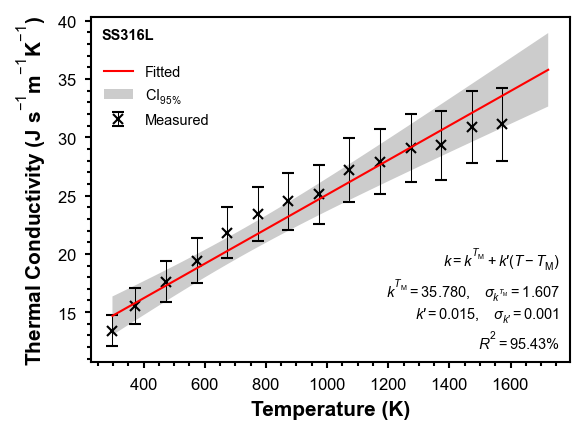

In [13]:
# matertial name 
mat_name = 'SS316L'
TM = 1723.15

# Read from thermal_properties.xlsx
table_name = 'thermal_properties.xlsx'
table_path = os.path.join(path, table_name)
df = pd.read_excel(table_path, sheet_name=mat_name , header=0)
df_k = df[['T (K)', 'k (W/(m K))', 'sigma_k']].dropna(axis=0,how='any') 
# delete any row having NaN, df.dropna(axis=0,how='any')
# delete rows which are all naN, df.dropna(axis=0,how='all')
# axis=1, working on the columns

# fitting the rho(T)
#===============================================
T = df_k['T (K)'].values
k = df_k['k (W/(m K))'].values
sigma_k = df_k['sigma_k'].values

# fitting with linear function using OLS, here pcov is the estimated covariance of popt
# Notice that since here sigma_rho has the same dimension as the data rho, in this case
# absolute_sigma = True, method = 'lm' represents using Levenberg-Marquardt algorithm
# for OLS
popt, pcov = curve_fit(linear_func, T, k, sigma = sigma_k, absolute_sigma =True, method ='lm')
# calculate the deviation of parameters out of the diagnal covariance matrix
perr = np.sqrt(np.diag(pcov))

# unpacking the parameters
q0, q1 = (v for v in popt)
sigma_q0, sigma_q1 = (v for v in perr)

# this will directly return the q0 +- sigma_q0
q0u, q1u = unc.correlated_values(popt, pcov)

# recalculate the predictions
K = linear_func(T, q0, q1)

SSE, MSE, RMSE, R_square = dev_analysis(K, k)

# simple_plot_init(Axis_Label, Xlim, Ylim, **kwargs)
fig, ax = simple_plot_init(['Temperature (K)','Thermal Conductivity (J s$^{-1}$m$^{-1}$K$^{-1}$)'], figsize = [4,3], dpi=150)

# calculate regression confidence interval
X = np.linspace(T.min(),TM,100)
Yu = linear_func(X, q0u, q1u) # regressions with uncertainties
nom = unp.nominal_values(Yu)  # regression line
std = unp.std_devs(Yu)
Y1 = nom + 1.96 * std
Y2 = nom - 1.96 * std


plt.errorbar(T, k, yerr= sigma_k, fmt='x', color='black', zorder=2, linewidth = 0.5,
              markersize=5, capsize=3, label = 'Measured')
# zorder is used to adjust the overlapping
#plt.scatter(T, k, c='black', s=5, zorder=1, label = 'Measured')
# plot the regression
plt.plot(X, nom, color='r', linewidth=1, zorder=5, label = 'Fitted')
# plt.plot(X, Y1, 'r--', linewidth=0.8, zorder=1)
# plt.plot(X, Y2, 'r--', linewidth=0.8, zorder=1)
plt.fill_between(X, Y1, Y2, facecolor="grey", alpha=0.4, zorder=1, label= r'$\mathrm{CI_{95\%}}$')


plt.legend(loc = "upper left", fontsize=7, frameon = False, bbox_to_anchor=(0, 0.9))

Annotate = ('$k=k^{T_\mathrm{M}} + k\prime(T-T_\mathrm{M})$\n'
            '$k^{T_\mathrm{M}}=%.3f,\quad\sigma_{k^{T_\mathrm{M}}}=%.3f$\n'
            '$k\prime=%.3f,\quad\sigma_{k\prime}=%.3f$\n'
            '$R^2=%.2f$%%' %(q0, sigma_q0, q1, sigma_q1, R_square*100))

ax.annotate(Annotate, xy=(1, 0), xycoords='axes fraction', fontsize=7,
                xytext=(-5, 5), textcoords='offset points',
                ha='right', va='bottom')

ax.annotate(mat_name, xy=(0, 1), xycoords='axes fraction', fontsize=7,
                xytext=(5, -5), textcoords='offset points', weight='bold',
                ha='left', va='top')
plt.tight_layout()
plt.savefig('k_vs_T.pdf', format = 'pdf', dpi = 150)

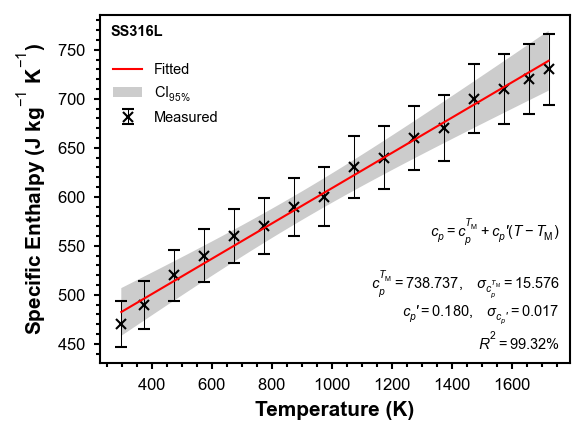

In [14]:
df_cp = df[['T (K)', 'Cp (J/K kg)', 'sigma_Cp']].dropna(axis=0,how='any') 


# fitting the rho(T)
#===============================================
T = df_cp['T (K)'].values
cp = df_cp['Cp (J/K kg)'].values
sigma_cp = df_cp['sigma_Cp'].values

# fitting with linear function using OLS, here pcov is the estimated covariance of popt
# Notice that since here sigma_rho has the same dimension as the data rho, in this case
# absolute_sigma = True, method = 'lm' represents using Levenberg-Marquardt algorithm
# for OLS
popt, pcov = curve_fit(linear_func, T, cp, sigma = sigma_cp, absolute_sigma =True, method ='lm')
# calculate the deviation of parameters out of the diagnal covariance matrix
perr = np.sqrt(np.diag(pcov))

# unpacking the parameters
q0, q1 = (v for v in popt)
sigma_q0, sigma_q1 = (v for v in perr)

# this will directly return the q0 +- sigma_q0
q0u, q1u = unc.correlated_values(popt, pcov)

# recalculate the predictions
Cp = linear_func(T, q0, q1)

SSE, MSE, RMSE, R_square = dev_analysis(Cp, cp)

# simple_plot_init(Axis_Label, Xlim, Ylim, **kwargs)
fig, ax = simple_plot_init(['Temperature (K)','Specific Enthalpy (J kg$^{-1}$ K$^{-1}$)'], figsize = [4,3], dpi=150)

# calculate regression confidence interval
X = np.linspace(T.min(),TM,100)
Yu = linear_func(X, q0u, q1u) # regressions with uncertainties
nom = unp.nominal_values(Yu)  # regression line
std = unp.std_devs(Yu)
Y1 = nom + 1.96 * std
Y2 = nom - 1.96 * std

plt.errorbar(T, cp, yerr= sigma_cp, fmt='x', color='black', zorder=2, linewidth = 0.5,
              markersize=5, capsize=3, label = 'Measured')

# plot the regression
plt.plot(X, nom, color='r', linewidth=1, zorder=5, label = 'Fitted')
# plt.plot(X, Y1, 'r--', linewidth=0.8, zorder=1)
# plt.plot(X, Y2, 'r--', linewidth=0.8, zorder=1)
plt.fill_between(X, Y1, Y2, facecolor="grey", alpha=0.4, zorder=1, label= r'$\mathrm{CI_{95\%}}$')
# zorder is used to adjust the overlapping
# plt.scatter(T, cp, c='black', s=5, zorder=2, label = 'Measured'  )


plt.legend(loc = "upper left", fontsize=7, frameon = False, bbox_to_anchor=(0, 0.9))


Annotate = ('$c_{p}=c_{p}^{T_\\mathrm{M}} + c_{p}\\prime(T-T_\\mathrm{M})$\n\n'
            '$c_{p}^{T_\\mathrm{M}}=%.3f,\\quad\\sigma_{c_{p}^{T_\\mathrm{M}}}=%.3f$\n'
            '$c_{p}\\prime=%.3f,\\quad\\sigma_{c_{p}\\prime}=%.3f$\n'
            '$R^2=%.2f$%%' %(q0, sigma_q0, q1, sigma_q1, R_square*100))

ax.annotate(Annotate, xy=(1, 0), xycoords='axes fraction', fontsize=7,
                xytext=(-5, 5), textcoords='offset points',
                ha='right', va='bottom')

ax.annotate(mat_name, xy=(0, 1), xycoords='axes fraction', fontsize=7,
                xytext=(5, -5), textcoords='offset points', weight='bold',
                ha='left', va='top')
plt.tight_layout()
plt.savefig('cp_vs_T.pdf', format = 'pdf', dpi = 150)
plt.show()

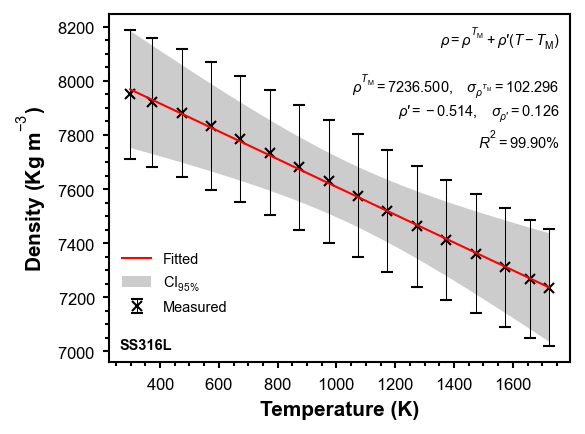

In [15]:

df_rho = df[['T (K)', 'rho (kg/m3)', 'sigma_rho']].dropna(axis=0,how='any')    

# fitting the rho(T)
#===============================================
T = df_rho['T (K)'].values
rho = df_rho['rho (kg/m3)'].values
sigma_rho = df_rho['sigma_rho'].values

# fitting with linear function using OLS, here pcov is the estimated covariance of popt
# Notice that since here sigma_rho has the same dimension as the data rho, in this case
# absolute_sigma = True, method = 'lm' represents using Levenberg-Marquardt algorithm
# for OLS
popt, pcov = curve_fit(linear_func, T, rho, sigma = sigma_rho, absolute_sigma =True, method ='lm')
# calculate the deviation of parameters out of the diagnal covariance matrix
perr = np.sqrt(np.diag(pcov))

# unpacking the parameters
q0, q1 = (v for v in popt)
sigma_q0, sigma_q1 = (v for v in perr)

# this will directly return the q0 +- sigma_q0
q0u, q1u = unc.correlated_values(popt, pcov)

# recalculate the predictions
Rho = linear_func(T, q0, q1)

SSE, MSE, RMSE, R_square = dev_analysis(Rho, rho)

# simple_plot_init(Axis_Label, Xlim, Ylim, **kwargs)
fig, ax = simple_plot_init(['Temperature (K)','Density (Kg m$^{-3}$)'], figsize = [4,3], dpi=150)

# calculate regression confidence interval
X = np.linspace(T.min(),TM,100)
Yu = linear_func(X, q0u, q1u) # regressions with uncertainties
nom = unp.nominal_values(Yu)  # regression line
std = unp.std_devs(Yu)
Y1 = nom + 1.96 * std
Y2 = nom - 1.96 * std

plt.errorbar(T, rho, yerr= sigma_rho, fmt='x', color='black', zorder=2, linewidth = 0.5,
              markersize=5, capsize=3, label = 'Measured')

# plot the regression
plt.plot(X, nom, color='r', linewidth=1, zorder=5, label = 'Fitted')
# plt.plot(X, Y1, 'r--', linewidth=0.8, zorder=1)
# plt.plot(X, Y2, 'r--', linewidth=0.8, zorder=1)
plt.fill_between(X, Y1, Y2, facecolor="grey", alpha=0.4, zorder=1, label = r'$\mathrm{CI_{95\%}}$')
# zorder is used to adjust the overlapping
#plt.scatter(T, rho, c='black', s=5, zorder=1, label = 'Measured')
plt.legend(loc = 3, fontsize=7, frameon = False, bbox_to_anchor=(0, 0.1))

#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

Annotate = ('$\\rho=\\rho^{T_\\mathrm{M}} + \\rho\\prime(T-T_\\mathrm{M})$\n\n'
            '$\\rho^{T_\\mathrm{M}}=%.3f,\\quad\\sigma_{\\rho^{T_\mathrm{M}}}=%.3f$\n'
            '$\\rho\\prime=%.3f,\\quad\\sigma_{\\rho\\prime}=%.3f$\n'
            '$R^2=%.2f$%%' %(q0, sigma_q0, q1, sigma_q1, R_square*100))

ax.annotate(Annotate, xy=(1, 1), xycoords='axes fraction', fontsize=7,
                xytext=(-5, -5), textcoords='offset points',
                ha='right', va='top')

ax.annotate(mat_name, xy=(0,0), xycoords='axes fraction', fontsize=7,
                xytext=(5, 5), textcoords='offset points', weight='bold',
                ha='left', va='bottom')
plt.tight_layout()
plt.savefig('rho_vs_T.pdf', format = 'pdf', dpi = 150)